# Classifying brains with Machine Learning

This notebook is the first notebook used by Cohort 9 to classify bird and dinosaur brain data.

In this notebook you will learn how to use machine learning to predict whether or not a brain belongs to a modern bird or a non-avian dinosaur. 

First import pandas, numpy, and matplotlib.pyplot:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

We will also need the tree module of the sklearn library:

In [2]:
from sklearn import tree

Read the bird_dino_data.csv file into a dataframe and add two new columns:
- Brain vs body mass (use total endocranium / body mass*1000)
- Cerebrum vs total brain (use cerebrum / endocranium)

In [9]:
df = pd.read_csv("../../data/bird_dino_data_c9.csv")
df.head()

,Species ID,Bird or Dino,Body Mass (kg),Total Endocranium (cm3),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3)
0,3,Bird,0.01,2.20,0.003,1.57,0.20,0.34,0.08
1,4,Bird,0.03,4.02,0.010,2.22,0.73,0.76,0.29
2,5,Bird,0.02,1.98,0.009,1.53,0.20,0.16,0.06
3,6,Bird,0.01,0.87,0.006,0.46,0.24,0.11,0.06
4,7,Bird,0.17,9.11,0.015,6.09,0.88,1.62,0.49


In [10]:
df["Brain Body Ratio"] = df["Total Endocranium (cm3)"]/(df["Body Mass (kg)"]*1000)
df["Cerebrum Ratio"] = df["Cerebrum (cm3)"]/df["Total Endocranium (cm3)"]

Find the head of your dataframe to check that your changes are correct:

In [11]:
df.head()

,Species ID,Bird or Dino,Body Mass (kg),Total Endocranium (cm3),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Brain Body Ratio,Cerebrum Ratio
0,3,Bird,0.01,2.20,0.003,1.57,0.20,0.34,0.08,0.220000,0.713636
1,4,Bird,0.03,4.02,0.010,2.22,0.73,0.76,0.29,0.134000,0.552239
2,5,Bird,0.02,1.98,0.009,1.53,0.20,0.16,0.06,0.099000,0.772727
3,6,Bird,0.01,0.87,0.006,0.46,0.24,0.11,0.06,0.087000,0.528736
4,7,Bird,0.17,9.11,0.015,6.09,0.88,1.62,0.49,0.053588,0.668496


Our machine learning library requires that we replace our "classes" with integers instead of strings. 

Change the values of the "Bird or Dino" column from "Bird" to "0" and from "Dino" to "1":

Hints: 
- use .loc indexes
- you can reassign the value in a dataframe column using =

*Ignore the warning. Pandas tries to discourage you from making changes to the original dataframe, but it's ok*

In [12]:
df["Bird or Dino"].loc[df["Bird or Dino"] == "Bird"] = 0
df["Bird or Dino"].loc[df["Bird or Dino"] == "Dino"] = 1

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Find the head of your dataframe to check that your changes are correct:

In [13]:
df.head()

,Species ID,Bird or Dino,Body Mass (kg),Total Endocranium (cm3),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Brain Body Ratio,Cerebrum Ratio
0,3,0,0.01,2.20,0.003,1.57,0.20,0.34,0.08,0.220000,0.713636
1,4,0,0.03,4.02,0.010,2.22,0.73,0.76,0.29,0.134000,0.552239
2,5,0,0.02,1.98,0.009,1.53,0.20,0.16,0.06,0.099000,0.772727
3,6,0,0.01,0.87,0.006,0.46,0.24,0.11,0.06,0.087000,0.528736
4,7,0,0.17,9.11,0.015,6.09,0.88,1.62,0.49,0.053588,0.668496


Our machine learning algorithm requires a numpy matrix instead of a dataframe. 

We can convert the dataframe to a numpy matrix using the .to_numpy() method. Assign your matrix to a variable:

In [14]:
data = df.to_numpy()

Print out the data type of matrix and the first value in the matrix (note: this is a two dimensional matrix):

In [15]:
print(type(data))
print(type(data[0,0]))

<class 'numpy.ndarray'>
<class 'numpy.float64'>


Now we will create our classifier. Just as it is common to call a dataframe "df" it is common to call a classifier "clf":

In [16]:
clf = tree.DecisionTreeClassifier()

Next, we will select the x and y data for our algorithm. x should be the two columns we will use to train the algorithm (brain to body ratio and cerebrum to whole brain ratio). y should be the first column which contains our "class labels".

Hint: You can use slicing to select a particular value from every row of a numpy array. For example, using the index [:,1] will select the second column.

In [17]:
x = data[:,9:]
y = data[:,1]

Next we will use the .fit() method to fit our data to the classifier:

In [18]:
clf = clf.fit(x, y)

We can visualize the path of the decision tree's decision making using the .plot_tree function:

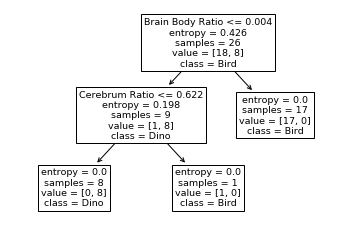

In [20]:
tree.plot_tree(clf, class_names=["Bird","Dino"], feature_names=["Brain Body Ratio", "Cerebrum Ratio"]) 
plt.show()

Now let's test out our decision tree with some data from one of the brains we studied! We can use the .predict_proba method. 

A result of array([[1., 0.]]) means the algorithm is certain it's a bird and a result of array([[0., 1.]]) means the algorithm is certain it's a dinosaur.

For example:

In [21]:
# This is the brain to body mass ratio and cerebrum to whole brain ratio for the woodpecker:
clf.predict_proba([[0.22,0.71]])

array([[1., 0.]])

Try it with the data from your brain specimen!

In [22]:
clf.predict_proba([[0.0005,0.59]])

array([[0., 1.]])

## Bonus Challenge: 
Try to train another classifier that's based on the size of each brain region and test it out!

## Extra code

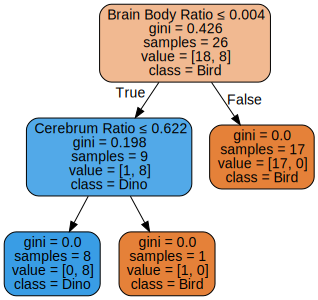

In [23]:
# Extra code to make the decision tree look better
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names= ['Brain Body Ratio', 'Cerebrum Ratio'],  
                      class_names=['Bird','Dino'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 